<a href="https://colab.research.google.com/github/Monukarthik/Multiple-Person-and-Object-detection/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
threshold=0.45

In [ ]:
img=cv2.imread("/content/WhatsApp Image 2022-08-07 at 6.04.54 PM.jpeg")

In [ ]:
classNames=[]
classFile="coco.names"

In [ ]:
with open(classFile,"rt") as f:
  classNames=[line.rstrip() for line in f]

In [ ]:
configpath="/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
weightspath="/content/frozen_inference_graph (1).pb"

In [ ]:
net=cv2.dnn_DetectionModel(weightspath,configpath)

In [ ]:
net.setInputSize(320,320)
net.setInputScale(1.0/127.5)
net.setInputMean(127.5)
net.setInputSwapRB(True)

< cv2.dnn.Model 0x7ea41b4a7610>

In [ ]:
classIds,confs,bbox=net.detect(img,confThreshold=0.5)

In [ ]:
print(classIds,bbox)

[ 1  1 42] [[ 882    1  710  685]
 [  78    0  713  699]
 [   7  528 1592  368]]


In [ ]:
for classId,confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
  cv2.rectangle(img,box,color=(0,255,0),thickness=2)
  cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+20),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

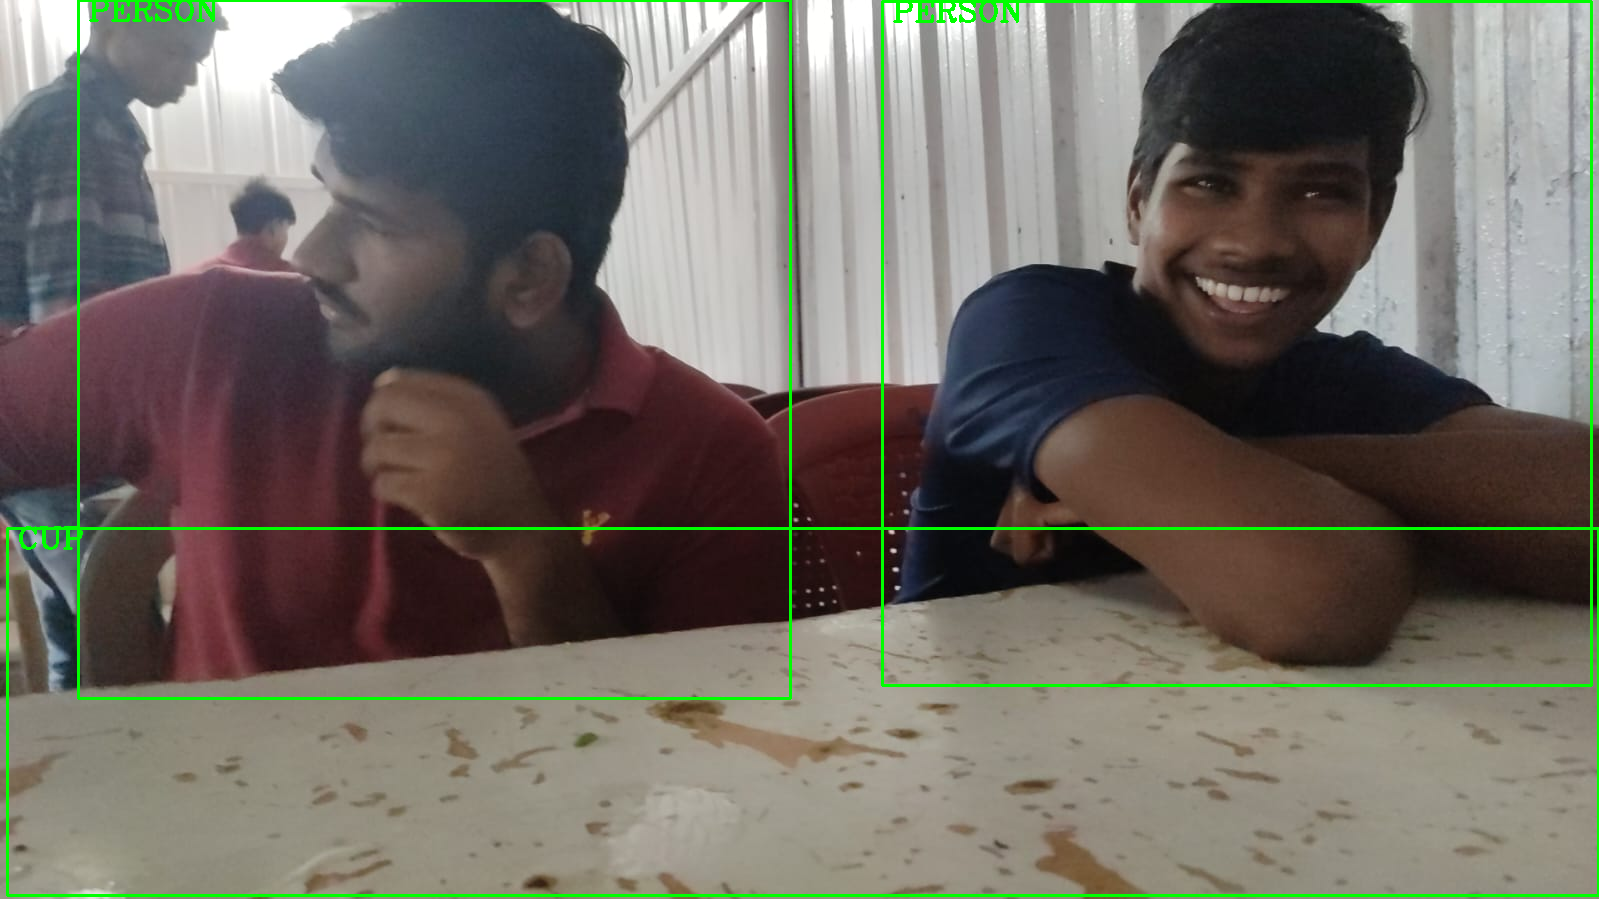

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
#for jupyter
#cv2.imshow("asd",img)
#cv2.waitkey(1)